In [1]:
import pandas as pd
import numpy as np
import io
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [3]:
data = [
  {'Month': 'Jul-70', 'Value': 13083.53632},
  {'Month': 'Aug-70', 'Value': 13531.51129},
  {'Month': 'Sep-70', 'Value': 14066.18983},
  {'Month': 'Oct-70', 'Value': 14432.95079},
  {'Month': 'Nov-70', 'Value': 15163.54335},
  {'Month': 'Dec-70', 'Value': 16214.81584},
  {'Month': 'Jan-71', 'Value': 12726.33663},
  {'Month': 'Feb-71', 'Value': 12829.31802},
  {'Month': 'Mar-71', 'Value': 12779.41167},
  {'Month': 'Apr-71', 'Value': 12416.18404},
  {'Month': 'May-71', 'Value': 11848.77095},
  {'Month': 'Jun-71', 'Value': 12423.73438},
  {'Month': 'Jul-71', 'Value': 13017.56784},
  {'Month': 'Aug-71', 'Value': 13172.94584},
  {'Month': 'Sep-71', 'Value': 13776.85746},
  {'Month': 'Oct-71', 'Value': 13746.47258},
  {'Month': 'Nov-71', 'Value': 14837.79831},
  {'Month': 'Dec-71', 'Value': 15758.37893},
  {'Month': 'Jan-72', 'Value': 12135.16695},
  {'Month': 'Feb-72', 'Value': 12636.89879},
  {'Month': 'Mar-72', 'Value': 12417.08746},
  {'Month': 'Apr-72', 'Value': 12089.97245},
  {'Month': 'May-72', 'Value': 11351.31364},
  {'Month': 'Jun-72', 'Value': 12024.99975},
  {'Month': 'Jul-72', 'Value': 12360.26576},
  {'Month': 'Aug-72', 'Value': 12770.39542},
  {'Month': 'Sep-72', 'Value': 13397.42152},
  {'Month': 'Oct-72', 'Value': 13462.91661},
  {'Month': 'Nov-72', 'Value': 14491.26251},
  {'Month': 'Dec-72', 'Value': 15911.1687},
  {'Month': 'Jan-73', 'Value': 12281.89313},
  {'Month': 'Feb-73', 'Value': 11695.20842},
  {'Month': 'Mar-73', 'Value': 11967.01998},
  {'Month': 'Apr-73', 'Value': 12261.27691},
  {'Month': 'May-73', 'Value': 11234.46983},
  {'Month': 'Jun-73', 'Value': 11480.35453},
  {'Month': 'Jul-73', 'Value': 12710.31123},
  {'Month': 'Aug-73', 'Value': 12562.35731},
  {'Month': 'Sep-73', 'Value': 13504.70023},
  {'Month': 'Oct-73', 'Value': 13404.5462},
  {'Month': 'Nov-73', 'Value': 14964.00222},
  {'Month': 'Dec-73', 'Value': 15384.67719},
  {'Month': 'Jan-74', 'Value': 11730.17438},
  {'Month': 'Feb-74', 'Value': 12190.12556},
  {'Month': 'Mar-74', 'Value': 11997.72582},
  {'Month': 'Apr-74', 'Value': 11996.22783},
  {'Month': 'May-74', 'Value': 11573.42911},
  {'Month': 'Jun-74', 'Value': 11524.57308},
  {'Month': 'Jul-74', 'Value': 12493.27972},
  {'Month': 'Aug-74', 'Value': 12602.58074},
  {'Month': 'Sep-74', 'Value': 13439.55261},
  {'Month': 'Oct-74', 'Value': 13434.95554},
  {'Month': 'Nov-74', 'Value': 14785.51909},
  {'Month': 'Dec-74', 'Value': 15596.46892},
  {'Month': 'Jan-75', 'Value': 11422.89474},
  {'Month': 'Feb-75', 'Value': 11364.81483},
  {'Month': 'Mar-75', 'Value': 10987.45265},
  {'Month': 'Apr-75', 'Value': 10979.1101},
  {'Month': 'May-75', 'Value': 11282.26322},
  {'Month': 'Jun-75', 'Value': 10877.91281},
  {'Month': 'Jul-75', 'Value': 11646.9488},
  {'Month': 'Aug-75', 'Value': 12506.51389},
  {'Month': 'Sep-75', 'Value': 12803.66726},
  {'Month': 'Oct-75', 'Value': 13463.04882},
  {'Month': 'Nov-75', 'Value': 13851.18278},
  {'Month': 'Dec-75', 'Value': 15389.4999},
  {'Month': 'Jan-76', 'Value': 11424.6813},
  {'Month': 'Feb-76', 'Value': 11532.44791},
  {'Month': 'Mar-76', 'Value': 11488.33461},
  {'Month': 'Apr-76', 'Value': 11553.54523},
  {'Month': 'May-76', 'Value': 11215.34076},
  {'Month': 'Jun-76', 'Value': 11281.22025},
  {'Month': 'Jul-76', 'Value': 11480.83078},
  {'Month': 'Aug-76', 'Value': 12001.04175},
  {'Month': 'Sep-76', 'Value': 12052.62402},
  {'Month': 'Oct-76', 'Value': 12508.64083},
  {'Month': 'Nov-76', 'Value': 14145.71339},
  {'Month': 'Dec-76', 'Value': 14768.30804},
  {'Month': 'Jan-77', 'Value': 11505.92498},
  {'Month': 'Feb-77', 'Value': 11048.60391},
  {'Month': 'Mar-77', 'Value': 10488.46889},
  {'Month': 'Apr-77', 'Value': 11190.66454},
  {'Month': 'May-77', 'Value': 10877.0935},
  {'Month': 'Jun-77', 'Value': 10728.73583},
  {'Month': 'Jul-77', 'Value': 11430.46936},
  {'Month': 'Aug-77', 'Value': 11642.56731},
  {'Month': 'Sep-77', 'Value': 12724.18116},
  {'Month': 'Oct-77', 'Value': 12755.07995},
  {'Month': 'Nov-77', 'Value': 13931.72231},
  {'Month': 'Dec-77', 'Value': 15118.4837},
  {'Month': 'Jan-78', 'Value': 10862.24169},
  {'Month': 'Feb-78', 'Value': 10810.22087},
  {'Month': 'Mar-78', 'Value': 10974.94082},
  {'Month': 'Apr-78', 'Value': 10887.78149},
  {'Month': 'May-78', 'Value': 10379.08373},
  {'Month': 'Jun-78', 'Value': 10493.52935},
  {'Month': 'Jul-78', 'Value': 11491.52928},
  {'Month': 'Aug-78', 'Value': 11608.57202},
  {'Month': 'Sep-78', 'Value': 12052.0898},
  {'Month': 'Oct-78', 'Value': 12801.75651},
  {'Month': 'Nov-78', 'Value': 13423.00201},
  {'Month': 'Dec-78', 'Value': 14929.63813},
  {'Month': 'Jan-79', 'Value': 10849.57559},
  {'Month': 'Feb-79', 'Value': 10373.6694},
  {'Month': 'Mar-79', 'Value': 10385.57228},
  {'Month': 'Apr-79', 'Value': 10735.57303},
  {'Month': 'May-79', 'Value': 10236.4591},
  {'Month': 'Jun-79', 'Value': 10098.90093},
  {'Month': 'Jul-79', 'Value': 11117.48256},
  {'Month': 'Aug-79', 'Value': 11133.25454},
  {'Month': 'Sep-79', 'Value': 11804.49061},
  {'Month': 'Oct-79', 'Value': 11933.72826},
  {'Month': 'Nov-79', 'Value': 13047.3504},
  {'Month': 'Dec-79', 'Value': 14075.48526},
  {'Month': 'Jan-80', 'Value': 10751.23556},
  {'Month': 'Feb-80', 'Value': 10364.39602},
  {'Month': 'Mar-80', 'Value': 9738.681744},
  {'Month': 'Apr-80', 'Value': 10579.10816},
  {'Month': 'May-80', 'Value': 9468.814223},
  {'Month': 'Jun-80', 'Value': 9361.008617},
  {'Month': 'Jul-80', 'Value': 10809.94548},
  {'Month': 'Aug-80', 'Value': 11240.28162},
  {'Month': 'Sep-80', 'Value': 11345.37386},
  {'Month': 'Oct-80', 'Value': 12088.11629},
  {'Month': 'Nov-80', 'Value': 13291.29294},
  {'Month': 'Dec-80', 'Value': 14129.88302},
  {'Month': 'Jan-81', 'Value': 10223.6316},
  {'Month': 'Feb-81', 'Value': 9952.313275},
  {'Month': 'Mar-81', 'Value': 10322.30606},
  {'Month': 'Apr-81', 'Value': 10318.65211},
  {'Month': 'May-81', 'Value': 9534.410815},
  {'Month': 'Jun-81', 'Value': 9472.153307},
  {'Month': 'Jul-81', 'Value': 10552.77969},
  {'Month': 'Aug-81', 'Value': 10417.453},
  {'Month': 'Sep-81', 'Value': 11552.73955},
  {'Month': 'Oct-81', 'Value': 11408.42729},
  {'Month': 'Nov-81', 'Value': 12430.95277},
  {'Month': 'Dec-81', 'Value': 13341.86997},
  {'Month': 'Jan-82', 'Value': 9826.792949},
  {'Month': 'Feb-82', 'Value': 10128.62825},
  {'Month': 'Mar-82', 'Value': 9574.272255},
  {'Month': 'Apr-82', 'Value': 10025.39093},
  {'Month': 'May-82', 'Value': 9217.268715},
  {'Month': 'Jun-82', 'Value': 8916.24448},
  {'Month': 'Jul-82', 'Value': 9806.806328},
  {'Month': 'Aug-82', 'Value': 10604.31442},
  {'Month': 'Sep-82', 'Value': 10693.35059},
  {'Month': 'Oct-82', 'Value': 11143.91071},
  {'Month': 'Nov-82', 'Value': 12160.71594},
  {'Month': 'Dec-82', 'Value': 13205.26508},
  {'Month': 'Jan-83', 'Value': 9798.710001},
  {'Month': 'Feb-83', 'Value': 9253.164741},
  {'Month': 'Mar-83', 'Value': 9839.088651},
  {'Month': 'Apr-83', 'Value': 9432.894367},
  {'Month': 'May-83', 'Value': 9512.565025},
  {'Month': 'Jun-83', 'Value': 9488.974028},
  {'Month': 'Jul-83', 'Value': 9991.848996},
  {'Month': 'Aug-83', 'Value': 10696.48532},
  {'Month': 'Sep-83', 'Value': 11220.23276},
  {'Month': 'Oct-83', 'Value': 11027.02156},
  {'Month': 'Nov-83', 'Value': 12162.23265},
  {'Month': 'Dec-83', 'Value': 13424.22098},
  {'Month': 'Jan-84', 'Value': 9874.851238},
  {'Month': 'Feb-84', 'Value': 9172.44243},
  {'Month': 'Mar-84', 'Value': 8809.182992},
  {'Month': 'Apr-84', 'Value': 9601.880656},
  {'Month': 'May-84', 'Value': 8761.686315},
  {'Month': 'Jun-84', 'Value': 8556.402461},
  {'Month': 'Jul-84', 'Value': 9916.094321},
  {'Month': 'Aug-84', 'Value': 10189.70795},
  {'Month': 'Sep-84', 'Value': 10301.55366},
  {'Month': 'Oct-84', 'Value': 10864.16805},
  {'Month': 'Nov-84', 'Value': 11929.39526},
  {'Month': 'Dec-84', 'Value': 12874.13795},
  {'Month': 'Jan-85', 'Value': 9234.115869},
  {'Month': 'Feb-85', 'Value': 9576.82516},
  {'Month': 'Mar-85', 'Value': 8522.160833},
  {'Month': 'Apr-85', 'Value': 8989.945561},
  {'Month': 'May-85', 'Value': 9102.999398},
  {'Month': 'Jun-85', 'Value': 8538.557823},
  {'Month': 'Jul-85', 'Value': 9134.024047},
  {'Month': 'Aug-85', 'Value': 10069.8646},
  {'Month': 'Sep-85', 'Value': 9911.210004},
  {'Month': 'Oct-85', 'Value': 10405.39861},
  {'Month': 'Nov-85', 'Value': 11727.73789},
  {'Month': 'Dec-85', 'Value': 12800.20388},
  {'Month': 'Jan-86', 'Value': 8864.014152},
  {'Month': 'Feb-86', 'Value': 9398.501675},
  {'Month': 'Mar-86', 'Value': 8757.925264},
  {'Month': 'Apr-86', 'Value': 8359.789192},
  {'Month': 'May-86', 'Value': 8783.229483},
  {'Month': 'Jun-86', 'Value': 8332.2357},
  {'Month': 'Jul-86', 'Value': 9166.46118},
  {'Month': 'Aug-86', 'Value': 9517.46583},
  {'Month': 'Sep-86', 'Value': 10516.66086},
  {"Month": "Oct-86", "Value": 10250.83125},
  {"Month": "Nov-86", "Value": 11150.07576},
  {"Month": "Dec-86", "Value": 12625.2602},
  {"Month": "Jan-87", "Value": 9228.481114},
  {"Month": "Feb-87", "Value": 8252.916833},
  {"Month": "Mar-87", "Value": 8292.692437},
  {"Month": "Apr-87", "Value": 8854.070519},
  {"Month": "May-87", "Value": 8281.482374},
  {"Month": "Jun-87", "Value": 7713.343266},
  {"Month": "Jul-87", "Value": 8635.271699},
  {"Month": "Aug-87", "Value": 9482.003577},
  {"Month": "Sep-87", "Value": 9784.098921},
  {"Month": "Oct-87", "Value": 9892.026694},
  {"Month": "Nov-87", "Value": 11126.31153},
  {"Month": "Dec-87", "Value": 11862.17908},
  {"Month": "Jan-88", "Value": 8347.390752},
  {"Month": "Feb-88", "Value": 8771.940964},
  {"Month": "Mar-88", "Value": 8171.719919},
  {"Month": "Apr-88", "Value": 8425.804479},
  {"Month": "May-88", "Value": 8397.960004},
  {"Month": "Jun-88", "Value": 7444.484285},
  {"Month": "Jul-88", "Value": 8243.596373},
  {"Month": "Aug-88", "Value": 9289.054112},
  {"Month": "Sep-88", "Value": 9661.568227},
  {"Month": "Oct-88", "Value": 10547.51235},
  {"Month": "Nov-88", "Value": 11006.54543},
  {"Month": "Dec-88", "Value": 12478.53456},
  {"Month": "Jan-89", "Value": 8365.000079},
  {"Month": "Feb-89", "Value": 8690.038655},
  {"Month": "Mar-89", "Value": 7842.218533},
  {"Month": "Apr-89", "Value": 7597.980118},
  {"Month": "May-89", "Value": 7851.163752},
  {"Month": "Jun-89", "Value": 8141.334935},
  {"Month": "Jul-89", "Value": 8200.463724},
  {"Month": "Aug-89", "Value": 9042.669938},
  {"Month": "Sep-89", "Value": 9762.457544},
  {"Month": "Oct-89", "Value": 10031.55276},
  {"Month": "Nov-89", "Value": 10619.89739},
  {"Month": "Dec-89", "Value": 11335.41106},
  {'Month': 'Jan-90', 'Value': 8319.548176},  
  {'Month': 'Feb-90', 'Value': 8440.158221},  
  {'Month': 'Mar-90', 'Value': 7564.842727},  
  {'Month': 'Apr-90', 'Value': 7301.707076},  
  {'Month': 'May-90', 'Value': 7257.695506},  
  {'Month': 'Jun-90', 'Value': 7611.351942},  
  {'Month': 'Jul-90', 'Value': 7825.842988},  
  {'Month': 'Aug-90', 'Value': 8678.375462},  
  {'Month': 'Sep-90', 'Value': 9135.981485},  
  {'Month': 'Oct-90', 'Value': 9485.378189},  
  {'Month': 'Nov-90', 'Value': 10956.34145},  
  {'Month': 'Dec-90', 'Value': 11439.2398},  
  {'Month': 'Jan-91', 'Value': 7998.662851},  
  {'Month': 'Feb-91', 'Value': 7853.530104},  
  {'Month': 'Mar-91', 'Value': 7250.151552},  
  {'Month': 'Apr-91', 'Value': 7884.564522},  
  {'Month': 'May-91', 'Value': 7544.970789},  
  {'Month': 'Jun-91', 'Value': 7354.981753},  
  {'Month': 'Jul-91', 'Value': 8368.80676},  
  {'Month': 'Aug-91', 'Value': 8200.995127},  
  {'Month': 'Sep-91', 'Value': 8856.778648},  
  {'Month': 'Oct-91', 'Value': 9715.52482},  
  {'Month': 'Nov-91', 'Value': 10161.49132},  
  {'Month': 'Dec-91', 'Value': 11079.68913},  
  {'Month': 'Jan-92', 'Value': 8316.603258},  
  {'Month': 'Feb-92', 'Value': 7640.088515},  
  {'Month': 'Mar-92', 'Value': 6999.406597},  
  {'Month': 'Apr-92', 'Value': 7450.137036},  
  {'Month': 'May-92', 'Value': 7392.609279},  
  {'Month': 'Jun-92', 'Value': 7200.381759},  
  {'Month': 'Jul-92', 'Value': 8157.20232},  
  {'Month': 'Aug-92', 'Value': 8269.133238},  
  {'Month': 'Sep-92', 'Value': 8223.178804},  
  {'Month': 'Oct-92', 'Value': 8990.747265}
]


df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

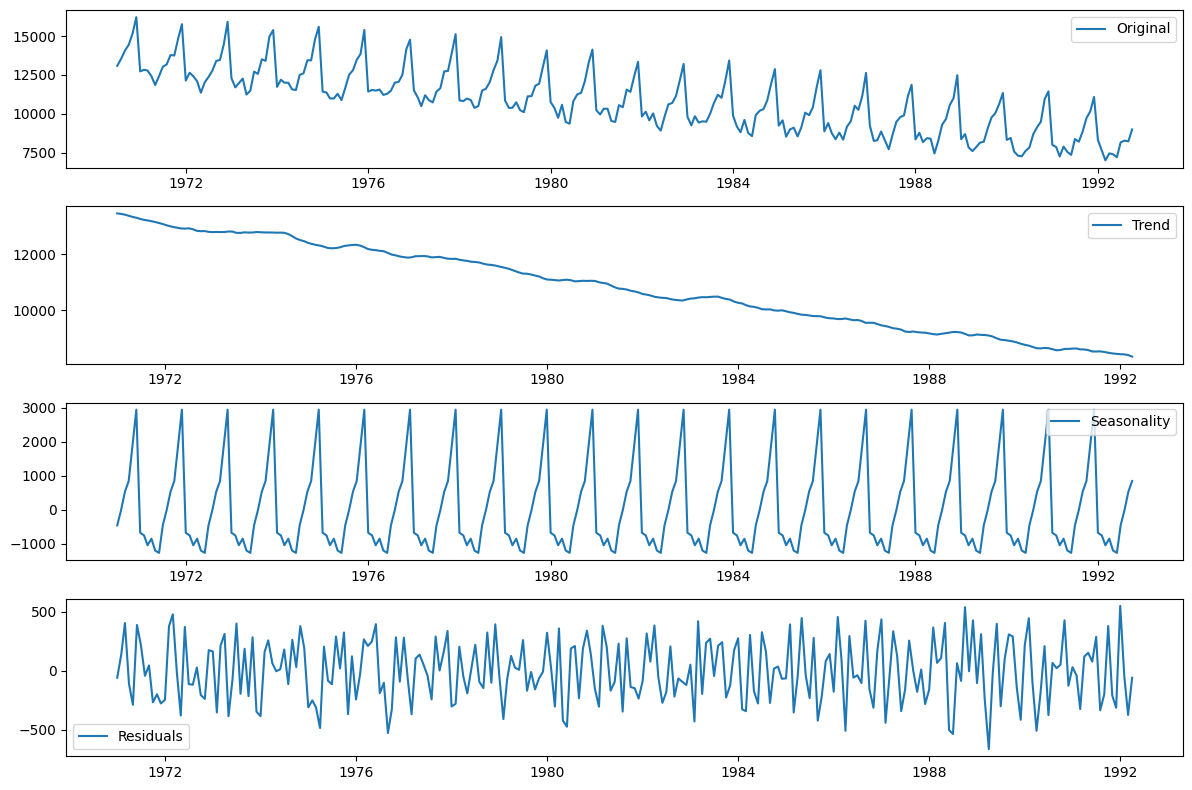

In [6]:
decomposition = seasonal_decompose(df['Value'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

1.

Monthly sales are not indepedent of the date. There is a clear seasonality as the plot shows which leads to the possibility to somewhat predict monthly sales.

In [7]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

first_difference = df['Value'].diff(1).dropna()
print("First difference stationarity test results:")
print(test_stationarity(first_difference))

First difference stationarity test results:
Test Statistic                -6.614086e+00
p-value                        6.270656e-09
# Lags Used                    1.300000e+01
Number of Observations Used    2.530000e+02
Critical Value (1%)           -3.456464e+00
Critical Value (5%)           -2.873033e+00
Critical Value (10%)          -2.572895e+00
dtype: float64


2.

To know if you can eliminate seasonality by differencing you will want to check the p-value from a stationarity test. Less than 0.05 and you have basically eliminated seasonality. As it is shown the p-value is: 6.27... e-09, which if my math is correct equals to: ~0.00000000627. 

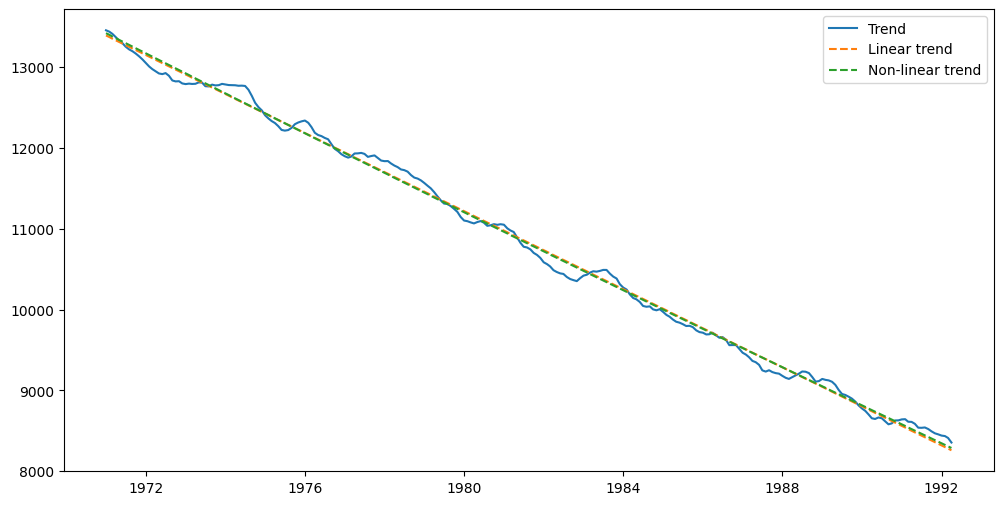

In [8]:
trend.dropna(inplace=True)
trend_month_number = (trend.index.year - trend.index[0].year) * 12 + trend.index.month - trend.index[0].month

linear_coef = np.polyfit(trend_month_number, trend.values, 1)
linear_trend = np.polyval(linear_coef, trend_month_number)

nonlinear_coef = np.polyfit(trend_month_number, trend.values, 2)
nonlinear_trend = np.polyval(nonlinear_coef, trend_month_number)

plt.figure(figsize=(12, 6))
plt.plot(trend.index, trend.values, label='Trend')
plt.plot(trend.index, linear_trend, label='Linear trend', linestyle='--')
plt.plot(trend.index, nonlinear_trend, label='Non-linear trend', linestyle='--')
plt.legend(loc='best')
plt.show()

3. 

Here you can clearly see a quite steady trend. As the linear and non-linear trend lines are plotted over the original trend line, you can assess if it's linear or non-linear depending on which one fits it better. With my eyes I would determine it as a non-linear trend.